In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

# import warnings
# warnings.filterwarnings("ignore")
# plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
# df = df.sample(frac= 0.20,replace = True).reset_index(drop = True)

# df.head()

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

What is the ratings across dataset

In [ ]:
rating_pct = df['Score'].value_counts()
rating_pct

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

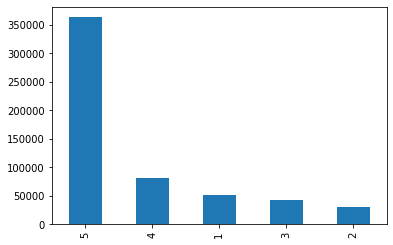

In [ ]:
rating_pct.plot.bar()
plt.show()

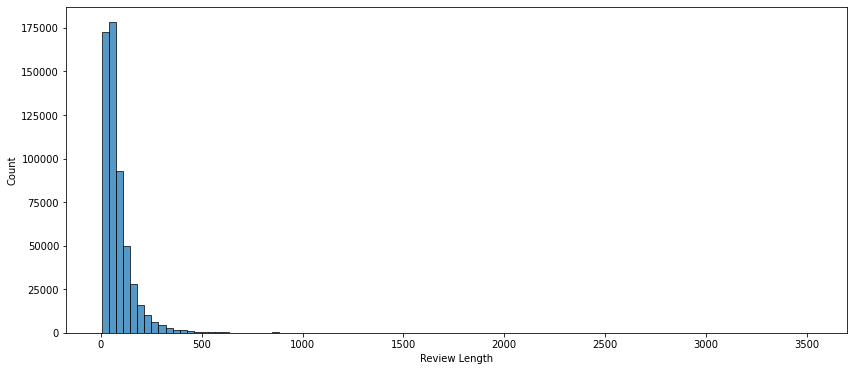

In [ ]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

### Plot of score vs helpfulnessnumerator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


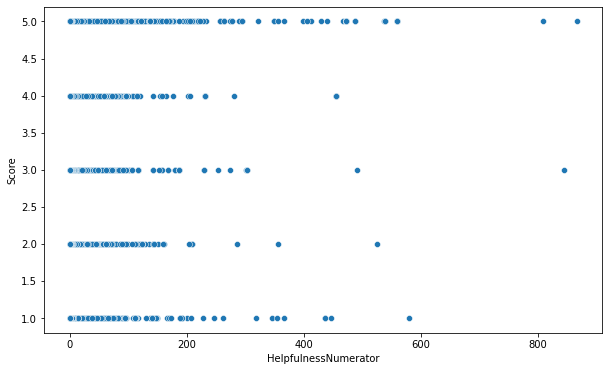

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(df['HelpfulnessNumerator'],df['Score'])

#### Word cloud of dataset before processing

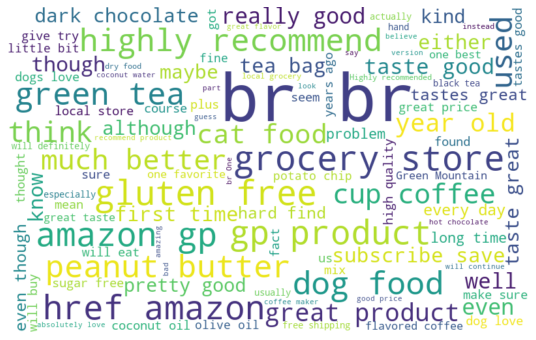

In [ ]:
plt.figure(figsize=(10,6))
txt = ' '.join(review for review in df.Text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Data Preprocessing and Transformation

In [ ]:
df = pd.DataFrame(df,columns = ['Score','Text'])
df.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [ ]:
def apply_sentiment(Rating):
    if(Rating <=3 ):
        return 0
    else:
        return 1

In [ ]:
df['Sentiment'] = df['Rating'].apply(apply_sentiment)
#df.drop(['Rating'],axis = 1, inplace = True)

In [ ]:
df

,Rating,Review,Sentiment
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1
...,...,...,...
568449,5,Great for sesame chicken..this is a good if no...,1
568450,2,I'm disappointed with the flavor. The chocolat...,0
568451,5,"These stars are small, so you can give 10-15 o...",1
568452,5,These are the BEST treats for training and rew...,1


In [ ]:
sentiment = df['Sentiment'].value_counts()
sentiment

1    443766
0    124645
Name: Sentiment, dtype: int64

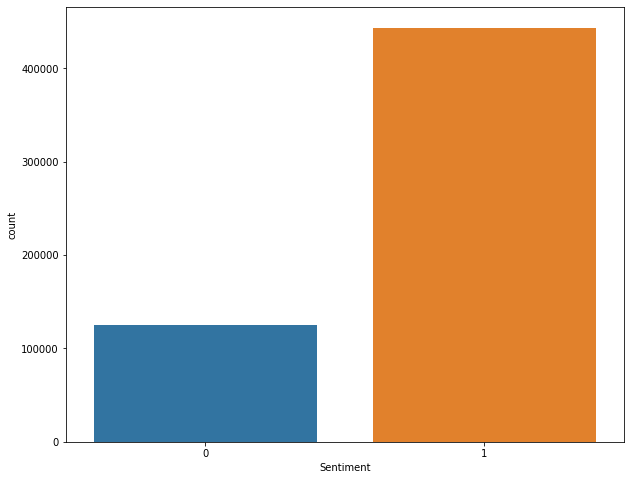

In [ ]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

In [ ]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review


In [ ]:
df['Review'] = df['Review'].apply(clean_text)

In [ ]:
df

,Rating,Review,Sentiment
0,5,i have bought several of the vitality canned d...,1
1,1,product arrived labeled as jumbo salted peanut...,0
2,4,this is a confection that has been around a fe...,1
3,2,if you are looking for the secret ingredient i...,0
4,5,great taffy at a great price there was a wide...,1
...,...,...,...
568449,5,great for sesame chickenthis is a good if not ...,1
568450,2,im disappointed with the flavor the chocolate ...,0
568451,5,these stars are small so you can give of thos...,1
568452,5,these are the best treats for training and rew...,1


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stopword = []
sentence = df['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df['reviews_text'] = df['Review'].apply(lambda row: ' '.join(remove_stopword(stop_words, row)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,Rating,Review,Sentiment,reviews_text
0,5,i have bought several of the vitality canned d...,1,bought several vitality canned dog food produc...
1,1,product arrived labeled as jumbo salted peanut...,0,product arrived labeled jumbo salted peanutsth...
2,4,this is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
3,2,if you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,5,great taffy at a great price there was a wide...,1,great taffy great price wide assortment yummy ...


### Wordcloud for processed text

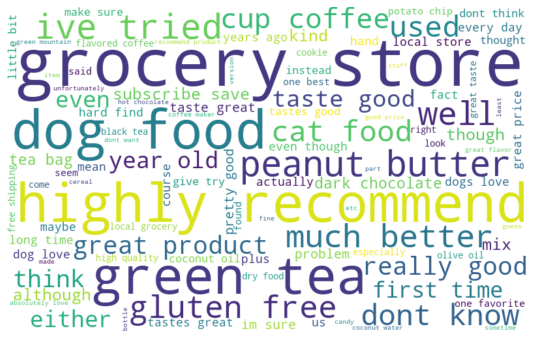

In [ ]:
plt.figure(figsize=(10,6))
txt = ' '.join(review for review in df.reviews_text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Train Test split

In [ ]:
X = df['reviews_text']
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((454728,), (113683,), (454728,))

In [ ]:
### Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [ ]:
nb_model = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Naive Bayes model Training accuracy:', nb_model.score(X_train,y_train))
print('Naive Bayes model Test accuracy:', nb_model.score(X_test,y_test))

Naive Bayes model Training accuracy: 0.8147354022624514
Naive Bayes model Test accuracy: 0.8079660107491885


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.12      0.21     24671
           1       0.80      1.00      0.89     89012

    accuracy                           0.81    113683
   macro avg       0.88      0.56      0.55    113683
weighted avg       0.84      0.81      0.74    113683

[[ 2962 21709]
 [  122 88890]]


In [ ]:
import pickle
# Saving the model
with open('NB_model2.pkl','wb') as f:
    pickle.dump(nb_model,f)

In [ ]:
# Positive example
nb_model.predict(['This product tastes amazing'])

array([1])

In [ ]:
# Negative example
nb_model.predict(['Worst company ever!!!. Horrible Product'])

array([0])

In [ ]:
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
    ])

In [ ]:
lr_model = clf2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred2 = lr_model.predict(X_test)

In [ ]:
print('Logistic Regression Training accuracy:', lr_model.score(X_train,y_train))
print('Logistic Regression Test accuracy:', lr_model.score(X_test,y_test))

Logistic Regression Training accuracy: 0.9112238525008357
Logistic Regression Test accuracy: 0.9022721075270709


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred2))

print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75     24671
           1       0.92      0.96      0.94     89012

    accuracy                           0.90    113683
   macro avg       0.87      0.83      0.85    113683
weighted avg       0.90      0.90      0.90    113683

[[17091  7580]
 [ 3530 85482]]


In [ ]:
import pickle
# Saving the model
with open('LR_model2.pkl','wb') as f:
    pickle.dump(lr_model,f)

In [ ]:
# Positive example
nb_model.predict(['This product tastes amazing'])

array([1])

In [ ]:
# Negative example
nb_model.predict(['Worst company ever!!!, not recommended at all'])

array([0])

### Recurrent Neural Network and LSTM

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN

In [39]:
### Taking only a sample of the dataset
df2 = df.sample(frac= 0.10,replace = True).reset_index(drop = True)

In [40]:
df2

,Rating,Review,Sentiment,reviews_text,Sentiment_en
0,5,i love kind walnut date bars this is my abso...,1,love kind walnut date bars absolute favorite f...,1
1,5,this thick hearty vegetable soup is pricey but...,1,thick hearty vegetable soup pricey wonderful w...,1
2,1,i placed an order with you on that was days...,0,placed order days ago tracking showed travelin...,0
3,5,you get a consistent cup of coffee with a hint...,1,get consistent cup coffee hint hazelnut cup ho...,1
4,2,the coffee tastes good when there arent ground...,0,coffee tastes good arent grounds coffee though...,0
...,...,...,...,...,...
56836,1,picture a straight stick lopped off at the top...,0,picture straight stick lopped top bare branche...,0
56837,3,guess i am one of the few that was not real im...,0,guess one real impressed flavor hate found tas...,0
56838,3,great tasting coffee arrived on time in a nic...,0,great tasting coffee arrived time nicely packa...,0
56839,5,wow good sauce but not at over at amazon at w...,1,wow good sauce amazon wegmans thingamazon way ...,1


### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
# Encoded the target column
lb=LabelEncoder()
df2['Sentiment_en'] = lb.fit_transform(df2['Sentiment'])
y = pd.get_dummies(df2['Sentiment_en'])

In [42]:
y

,0,1
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
56836,1,0
56837,1,0
56838,1,0
56839,0,1


In [43]:
df2

,Rating,Review,Sentiment,reviews_text,Sentiment_en
0,5,i love kind walnut date bars this is my abso...,1,love kind walnut date bars absolute favorite f...,1
1,5,this thick hearty vegetable soup is pricey but...,1,thick hearty vegetable soup pricey wonderful w...,1
2,1,i placed an order with you on that was days...,0,placed order days ago tracking showed travelin...,0
3,5,you get a consistent cup of coffee with a hint...,1,get consistent cup coffee hint hazelnut cup ho...,1
4,2,the coffee tastes good when there arent ground...,0,coffee tastes good arent grounds coffee though...,0
...,...,...,...,...,...
56836,1,picture a straight stick lopped off at the top...,0,picture straight stick lopped top bare branche...,0
56837,3,guess i am one of the few that was not real im...,0,guess one real impressed flavor hate found tas...,0
56838,3,great tasting coffee arrived on time in a nic...,0,great tasting coffee arrived time nicely packa...,0
56839,5,wow good sauce but not at over at amazon at w...,1,wow good sauce amazon wegmans thingamazon way ...,1


In [57]:
df2['Sentiment'].value_counts()

1    44378
0    12463
Name: Sentiment, dtype: int64

### Tokenizing, Padding and converting to sequences

In [44]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df2['reviews_text'].values)
X = tokenizer.texts_to_sequences(df2['reviews_text'].values)
X = pad_sequences(X)

In [45]:
X

array([[  0,   0,   0, ..., 163,  21, 360],
       [  0,   0,   0, ..., 130, 171, 291],
       [  0,   0,   0, ..., 255, 235, 125],
       ...,
       [  0,   0,   0, ..., 346,   1,   6],
       [  0,   0,   0, ..., 141,  10,  21],
       [  0,   0,   0, ...,  57, 154, 349]], dtype=int32)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Model building

In [54]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 660, 120)          60000     
                                                                 
 spatial_dropout1d_10 (Spati  (None, 660, 120)         0         
 alDropout1D)                                                    
                                                                 
 lstm_5 (LSTM)               (None, 256)               386048    
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 446,562
Trainable params: 446,562
Non-trainable params: 0
_________________________________________________________________
None


### Model Training

In [55]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
1421/1421 [==============================] - 233s 162ms/step - loss: 0.3869 - accuracy: 0.8323
Epoch 2/5
1421/1421 [==============================] - 230s 162ms/step - loss: 0.3501 - accuracy: 0.8469
Epoch 3/5
 139/1421 [=>............................] - ETA: 3:27 - loss: 0.3287 - accuracy: 0.8554

KeyboardInterrupt: ignored

In [56]:
### Accuracy of LSTM model
model.evaluate(X_test,y_test)

356/356 [==============================] - 21s 56ms/step - loss: 0.3552 - accuracy: 0.8470


[0.3551769554615021, 0.8470401763916016]